# StackOverflow Data Scientists

This work will address three main questions
 1. Is Data Science a trending profession? Can we see a rise in the number of Data Scientists along the years?
 2. What differentiates data scientists from other professionals? What are the main difference in the technological knowledge and education.
 3. How those differences translates explain their earnings.

## 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from typing import Any
import seaborn as sns

sns.set()

%matplotlib inline

## 1.0 Number of Data Science developers evolution

To answer the first question we will be using the data from the surveys from 2017 to 2020. For each year we will load the dataset from the respective year and select the column respective to the question relative to developer type. In this question the respondents select multiple type of developers that bets describe them. We will then remove missing rows from this variable. We then get the percentage of valid answers that checked options that contained 'Data scientist' or 'Machine learning'.

In [2]:
# loading devtype data from years 2017 to 2020
years_range = range(2017, 2021)

def load_devtype_answers(year: int) -> pd.Series:
    filepath = os.path.join('data', str(year), 'data.csv')
    col = 'DevType' if year > 2017 else 'DeveloperType'
    df = pd.read_csv(filepath, usecols=[col])    
    devtype_answers = df[col]
    devtype_answers.dropna(inplace=True)
    return devtype_answers

years_devtype_answers = {year: load_devtype_answers(year) for year in years_range}

In [3]:
def gen_ds_percent(devtype: pd.Series) -> float:
    ds = devtype.str.contains('Data scientist')
    ml = devtype.str.contains('Machine learning')
    is_data_scientist = ds | ml
    return is_data_scientist.mean()

In [4]:
years_ds_percentages = {year: gen_ds_percent(data) for year, data in years_devtype_answers.items()}
years_ds_percentages

{2017: 0.09951557093425606,
 2018: 0.07696149753523421,
 2019: 0.07942460195487798,
 2020: 0.08077780028357302}

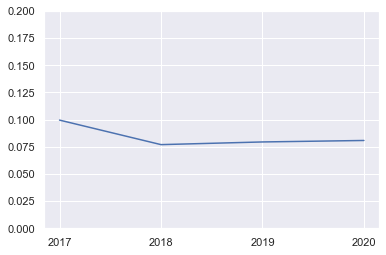

In [5]:
pd.Series(years_ds_percentages).plot();
plt.ylim(0, .2);
plt.xticks(years_range);

In [6]:
obs_diff = years_ds_percentages[2020] - years_ds_percentages[2017]
obs_diff

-0.018737770650683036

The main question is if this change is really statistically significant, or not. For this we will test our hypothesis if there is any statistical change betwween the percentage of developers that are Data Scientists from 2017 to 2020.

$$H_0: \mu_{2020} = \mu_{2017} $$
$$H_1: \mu_{2020} \neq \mu_{2017} $$

In [7]:
def bootstrap(data: pd.Series, n=10000) -> np.array:
    sample_size = data.shape[0]
    replicates = []
    for _ in range(n):
        sample = data.sample(sample_size, replace=True)
        replicate = gen_ds_percent(sample)
        replicates.append(replicate)
    return np.array(replicates)

In [8]:
diff_replicates = bootstrap(years_devtype_answers[2020]) - bootstrap(years_devtype_answers[2017])

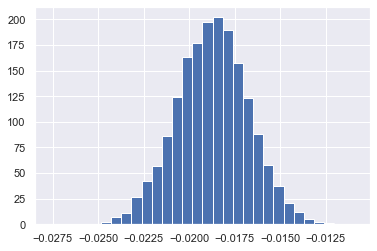

In [9]:
plt.hist(diff_replicates, density=True, bins=30);

In [10]:
replicates_std = diff_replicates.std()
replicates_size = diff_replicates.size
null_mean = 0
null_vals = np.random.normal(null_mean, replicates_std, replicates_size)

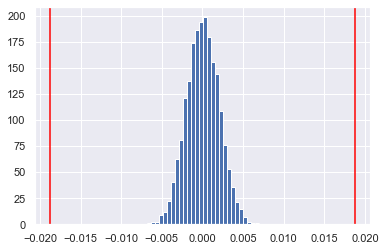

In [11]:
plt.hist(null_vals, density=True, bins=30);
lower_bound = obs_diff
upper_bound = -obs_diff
plt.axvline(lower_bound, color='red')
plt.axvline(upper_bound, color='red');

In [12]:
p_value = np.mean(null_vals > upper_bound) + np.mean(null_vals < lower_bound)
p_value

0.0

In [13]:
size_2017 = years_devtype_answers[2017].shape[0]
size_2020 = years_devtype_answers[2020].shape[0]
size_2017, size_2020

(36125, 49370)

Given the estimated p-value of 0, we can reject our null hypotesis that the percentages of data scientsts respondents in 2017 and 2020 are equal. 
Whoever this might have happened as a result of a the large sample that we had in both years.
One limitation of hypotesis testing and confidence intervals is that with a big enough sample, any change could be considered statistically significant.

In this sense, looking at the data from Stack Overflow Surveys, we can argue that Data Science can not be considered a trending job.

In [24]:
folder = 'data/2015'
file = os.path.join(folder, 'data.csv')
df = pd.read_csv(file, skiprows=1)
df['Occupation'].value_counts()#['Data scientist']

Full-stack web developer                                 6765
Student                                                  2845
Back-end web developer                                   2104
Desktop developer                                        1735
Front-end web developer                                  1242
Mobile developer - Android                                847
Mobile developer - iOS                                    634
Embedded application developer                            609
Enterprise level services developer                       599
Developer with a statistics or mathematics background     464
Data scientist                                            409
Mobile developer                                          376
Executive (VP of Eng., CTO, CIO, etc.)                    376
System administrator                                      344
DevOps                                                    322
Business intelligence or data warehousing expert          179
Graphics

In [43]:
folder = 'data/2016'
file = os.path.join(folder, 'data.csv')
df = pd.read_csv(file)
#df['Occupation'].value_counts()#['Data scientist']
df.occupation.value_counts(normalize=True)

Full-stack web developer                                 0.280418
Back-end web developer                                   0.122397
Student                                                  0.113472
Desktop developer                                        0.068459
Front-end web developer                                  0.058018
other                                                    0.052202
Enterprise level services developer                      0.029706
Mobile developer - Android                               0.029524
Mobile developer                                         0.027727
Embedded application developer                           0.025606
Mobile developer - iOS                                   0.025142
DevOps                                                   0.021689
Developer with a statistics or mathematics background    0.019386
Executive (VP of Eng., CTO, CIO, etc.)                   0.017933
Data scientist                                           0.016155
System adm

In [36]:
folder = 'data/2017'
file = os.path.join(folder, 'schema.csv')
df = pd.read_csv(file)
#df['Occupation'].value_counts()#['Data scientist']
#df.occupation.value_counts()
df.set_index('Column', inplace=True)
df.loc['DeveloperType']

Question    Which of the following best describe you?
Name: DeveloperType, dtype: object

In [55]:
folder = 'data/2017'
file = os.path.join(folder, 'data.csv')
df = pd.read_csv(file)
df['DeveloperType'].str.split(';').explode().str.strip().value_counts().div(df.shape[0])

Web developer                                            0.510488
Desktop applications developer                           0.203047
Mobile developer                                         0.162010
Database administrator                                   0.101027
Developer with a statistics or mathematics background    0.079604
Systems administrator                                    0.079507
DevOps specialist                                        0.078125
Embedded applications/devices developer                  0.065224
Data scientist                                           0.059250
Other                                                    0.052421
Graphics programming                                     0.033682
Graphic designer                                         0.027748
Machine learning specialist                              0.026833
Quality assurance engineer                               0.024362
Name: DeveloperType, dtype: float64

In [222]:
def gen_ds_percent(devtype: pd.Series) -> float:
    is_data_scientist = devtype.str.contains('Data scientist') | devtype.str.contains('Machine learning')
    return is_data_scientist.mean()
    
def load_devtype_data(year: int) -> pd.Series:
    filepath = os.path.join('data', str(year), 'data.csv')
    df = pd.read_csv(filepath)
    col = 'DevType' if year > 2017 else 'DeveloperType'
    devtypes = df[col]
    devtypes.dropna(inplace=True)
    return devtypes

def bootstrap_ds_percent(year: int, sample_size=500, n_samples=1000) -> list:
    devtype = load_devtype_data(year)
    return [gen_ds_percent(devtype.sample(sample_size)) for _ in range(n_samples)]

survey_years = [2017, 2018, 2019, 2020]
years_ds_percent = [bootstrap_ds_percent(year) for year in survey_years]
df = pd.DataFrame(np.array(years_ds_percent).T)
df.columns = survey_years
df.head()

C:\Users\leona\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.


,2017,2018,2019,2020
0,0.116,0.058,0.080,0.092
1,0.090,0.072,0.084,0.088
2,0.094,0.080,0.078,0.096
3,0.108,0.090,0.086,0.094
4,0.100,0.086,0.062,0.076


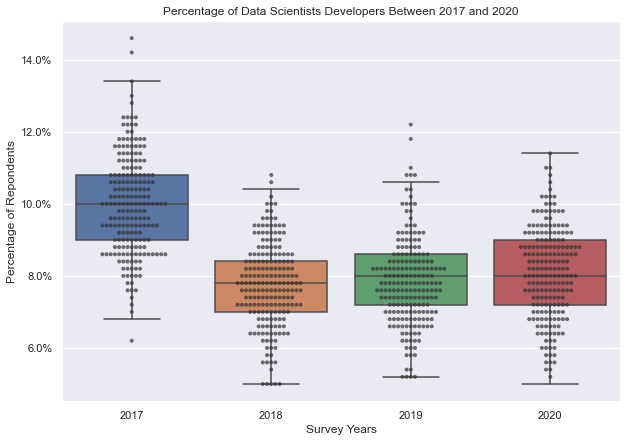

In [228]:
plt.figure(figsize=(10, 7))
ax = sns.swarmplot(data=df.sample(200).mul(100).melt(), x='variable', y='value', color='.2', alpha=.7, size=4);
ax = sns.boxplot(data=df.mul(100), showfliers=False);
plt.xlabel('Survey Years')
plt.ylabel('Percentage of Repondents');
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentage of Data Scientists Developers Between 2017 and 2020');

H0 - 2020 <= 2017       2020 - 2017 <= 0

H1 - 2020 > 2017        2020 - 2017 > 0

Dois extremos em tipos de erro:
 - tipo 1, é inocente (H0 = V) e eu acho culpado (H1 = R) - > falso positivo (considerado o pior tipo de erro) (alpha)
 - tipo 2, é culpado (H0 = F) e eu acho inocente (H0 = R) - > falso negativo (beta)

Como erro tipo 1 é muito pior, em geral se assume um percentual máximo de erro aceitável para ele.

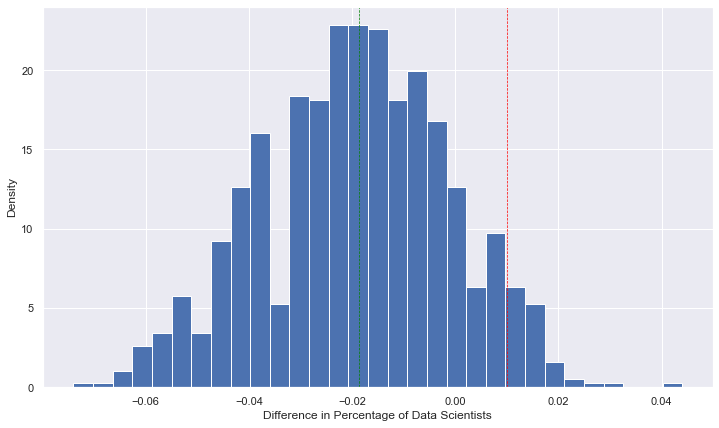

In [262]:
diff = df[2020] - df[2017]
upper_bound = np.percentile(diff,  95)
nbins = int(np.sqrt(len(diff)))

plt.figure(figsize=(12, 7))
plt.hist(diff, bins=nbins, density=True);
#plt.axvline(x=lower_bound, color='red', linestyle='--', linewidth=.7, alpha=0.6)
plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=.7, alpha=1)
plt.axvline(x=diff_sample, color='green', linestyle='--', linewidth=.7, alpha=1)
plt.xlabel('Difference in Percentage of Data Scientists')
plt.ylabel('Density');

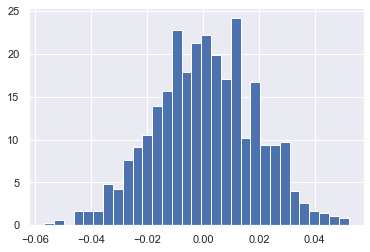

In [233]:
null_vals = np.random.normal(0, diff.std(), diff.shape[0])
plt.hist(null_vals, bins=nbins, density=True);

In [261]:
diff_sample = gen_ds_percent(load_devtype_data(2020)) - gen_ds_percent(load_devtype_data(2017))

In [254]:
(diff_sample < null_vals).mean()

0.171

In [251]:
null_mean = 0
(null_vals > diff_sample).mean() + (null_vals < null_mean + (null_mean - diff_sample)).mean()

0.31000000000000005

We can't reject the null hypothesis that the percentage of respondents that are Data Scientists are the same between 2017 and 2020. So, even though we had a reduction in our sample from 2017 to our sample in 2020, we can't affirm that this change is statistically significant.

In [252]:
null_mean + (null_mean - diff_sample)

-0.018737770650683036

In [235]:
load_devtype_data(2017)

2                                                    Other
4        Mobile developer; Graphics programming; Deskto...
7                                            Web developer
8                          Web developer; Mobile developer
9         Mobile developer; Desktop applications developer
                               ...                        
51384                                        Web developer
51386    Web developer; Mobile developer; Developer wit...
51387    Web developer; Developer with a statistics or ...
51389                 Web developer; Systems administrator
51390                      Web developer; Mobile developer
Name: DeveloperType, Length: 36125, dtype: object

In [145]:
df.melt().corr()

,variable,value
variable,1.000000,-0.365433
value,-0.365433,1.000000


In [154]:
((df[2020] - df[2017]) < 0).mean()

0.83

In [49]:
folder = 'data/2018'
file = os.path.join(folder, 'data.csv')
df = pd.read_csv(file)
df['DevType'].str.split(';').explode().value_counts().div(df.shape[0])

Back-end developer                               0.539174
Full-stack developer                             0.448667
Front-end developer                              0.352253
Mobile developer                                 0.190218
Desktop or enterprise applications developer     0.159901
Student                                          0.159142
Database administrator                           0.133691
Designer                                         0.121582
System administrator                             0.104952
DevOps specialist                                0.096596
Data or business analyst                         0.076466
Data scientist or machine learning specialist    0.071701
QA or test developer                             0.062657
Engineering manager                              0.053169
Embedded applications or devices developer       0.048748
Game or graphics developer                       0.046958
Product manager                                  0.043660
Educator or ac

In [50]:
folder = 'data/2019'
file = os.path.join(folder, 'data.csv')
df = pd.read_csv(file)
df['DevType'].str.split(';').explode().value_counts().div(df.shape[0])

Developer, full-stack                            0.475029
Developer, back-end                              0.457512
Developer, front-end                             0.299821
Developer, desktop or enterprise applications    0.194818
Developer, mobile                                0.165363
Student                                          0.134120
Database administrator                           0.107107
Designer                                         0.103304
System administrator                             0.100458
DevOps specialist                                0.099704
Developer, embedded applications or devices      0.081545
Data scientist or machine learning specialist    0.072680
Developer, QA or test                            0.071543
Data or business analyst                         0.070812
Academic researcher                              0.066717
Engineer, data                                   0.065468
Educator                                         0.050538
Developer, gam

In [53]:
folder = 'data/2020'
file = os.path.join(folder, 'data.csv')
df = pd.read_csv(file)
df['DevType'].str.split(';').explode().value_counts().div(df.shape[0])

Developer, back-end                              0.422395
Developer, full-stack                            0.420797
Developer, front-end                             0.283831
Developer, desktop or enterprise applications    0.182808
Developer, mobile                                0.147097
DevOps specialist                                0.092599
Database administrator                           0.088767
Designer                                         0.082546
System administrator                             0.081320
Developer, embedded applications or devices      0.073688
Data or business analyst                         0.062425
Data scientist or machine learning specialist    0.061867
Developer, QA or test                            0.061231
Engineer, data                                   0.057989
Academic researcher                              0.055103
Educator                                         0.045423
Developer, game or graphics                      0.043266
Engineering ma

 Questões potenciais:
  1. Como está a evolução da quantidade de profissionais de análise de dados e ciência de dados
  2. Percentual desse grupo ao longo do ano
  3. Situaao de emprego
  4. Evolução da remuneração desse grupo ao longo do ano | absoluta e comparada ao total
  5. Satisfação desse grupo | absoluta e comparada com ao total
  6. Como esses profissionais aconselham entrar no mercado de trabalho.
  7. Como isso é impactado por outros fatores.
  8. Caracterização desse grupo em relação ao resto.

In [2]:
df = pd.read_csv('data/2020/survey_results_public.zip', index_col='Respondent')
MainBranch = ['I am a developer by profession',
              'I am not primarily a developer, but I write code sometimes as part of my work']
MainBranch_select = df['MainBranch'].isin(MainBranch)

Employment = ['Independent contractor, freelancer, or self-employed',
              'Employed full-time', 'Employed part-time']
Employment_select = df['Employment'].isin(Employment)

select_rows = MainBranch_select & Employment_select
df = df.loc[select_rows]

not_selected_col = ['Age', 'Age1stCode', 'Ethnicity', 'Gender', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWJobHuntResearch',
                  'NEWOffTopic', 'NEWOnboardGood', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck',
                  'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase',
                  'SurveyLength', 'Trans', 'WelcomeChange']

df.drop(columns=not_selected_col, inplace=True)

schema = pd.read_csv('data/2020/survey_results_schema.csv', index_col='Column')

In [3]:
def col_info(col_name, df=df, schema=schema):
    description = schema.loc[col_name][0]
    print(f'{col_name}:\n{description}')
    print('-'*100)
    print(f'Percent de registros missing: {df[col_name].isna().mean():.2%}')
    print('-'*100)
    if df[col_name].dtype == 'object':
        unique_vals = df[col_name].unique()
        print('Registros Únicos')
        print(unique_vals)
        print('-'*100)
    print(df[col_name].describe())

In [4]:
for col in df.columns:
    col_info(col)
    print()
    print('#'*100)
    print()

MainBranch:
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
----------------------------------------------------------------------------------------------------
Percent de registros missing: 0.00%
----------------------------------------------------------------------------------------------------
Registros Únicos
['I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work']
----------------------------------------------------------------------------------------------------
count                              49983
unique                                 2
top       I am a developer by profession
freq                               45054
Name: MainBranch, dtype: object

####################################################################################################

Hobbyist:
Do you code as a hobby?
----------------------------------------------------------------------

First let us see the percentual of missing values by variables.

In [24]:
MainBranch = ['I am a developer by profession',
              'I am not primarily a developer, but I write code sometimes as part of my work']
MainBranch_select = df['MainBranch'].isin(MainBranch)

Employment = ['Independent contractor, freelancer, or self-employed',
              'Employed full-time', 'Employed part-time']
Employment_select = df['Employment'].isin(Employment)


select_rows = MainBranch_select & Employment_select
df.loc[select_rows].isna().mean().sort_values(ascending=False).mul(100).round(2).to_frame('Missing Values (%)')

,Missing Values (%)
WebframeDesireNextYear,35.69
MiscTechWorkedWith,35.51
MiscTechDesireNextYear,32.95
WebframeWorkedWith,30.71
ConvertedComp,30.54
CompTotal,30.40
DatabaseDesireNextYear,29.58
NEWCollabToolsDesireNextYear,25.03
PlatformDesireNextYear,20.29
DatabaseWorkedWith,20.24


In [6]:
select_rows.sum()

49983

In [15]:
devtype_distr = df['DevType'].str.split(';').explode().dropna().value_counts().div(df.shape[0])
devtype_distr.mul(100).round(2).to_frame('Distribution of DevTypes (%)')

,Distribution of DevTypes (%)
"Developer, full-stack",50.68
"Developer, back-end",50.67
"Developer, front-end",33.52
"Developer, desktop or enterprise applications",21.87
"Developer, mobile",17.16
DevOps specialist,11.39
Database administrator,10.45
System administrator,9.30
Designer,9.07
"Developer, embedded applications or devices",8.72


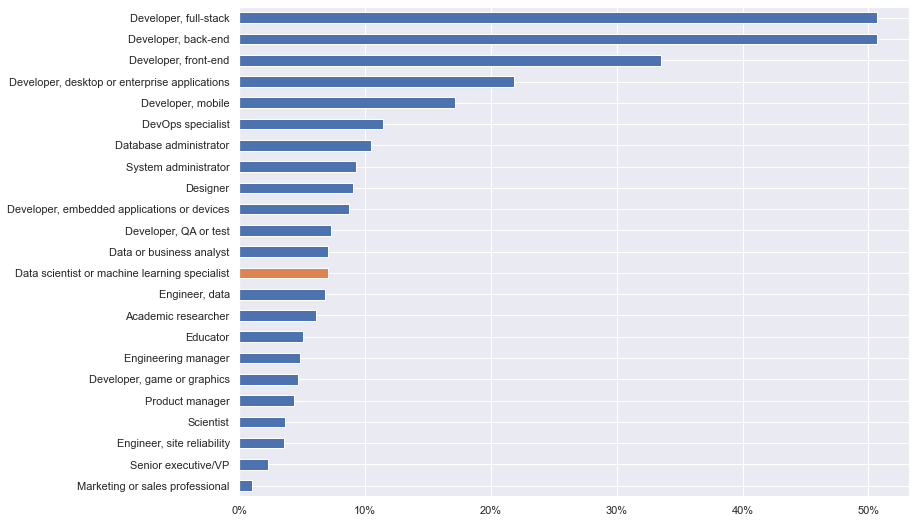

In [22]:
diff_index = 'Data scientist or machine learning specialist'
palette = sns.color_palette()
colors = [palette[1] if i == diff_index else palette[0] for i in devtype_distr.index]

ax = devtype_distr.plot(kind='barh', figsize=(12, 9), color=colors)
plt.gca().invert_yaxis()
ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.show()

In [5]:
df['DataScience'] = df['DevType'].str.contains('Data scientist or machine learning specialist')
df['DataScience'].fillna(False, inplace=True)
print(f'Percents of devs that are Data Scientists: {df["DataScience"].mean():.2%} ({df["DataScience"].sum()})')

Percents of devs that are Data Scientists: 7.06% (3529)


In [6]:
sats_order = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Very satisfied']
df['JobSat'] = pd.Categorical(values=df['JobSat'], categories=sats_order, ordered=True)

In [7]:
def comparing_categoricals(data, categorical):
    ds_data = data.loc[data['DataScience']].copy()
    other_data = data.loc[~data['DataScience']].copy()
    
    ds_jobfactors_data = ds_data[categorical].dropna()
    ds_jobfactors = (ds_jobfactors_data.str.split(';').
                     explode().value_counts().
                     div(ds_jobfactors_data.shape[0]).
                     to_frame('Data Scientists'))
    
    other_jobfactors_data = other_data[categorical].dropna()
    other_jobfactors = (other_jobfactors_data.str.split(';').
                        explode().value_counts().
                        div(other_jobfactors_data.shape[0]).
                        rename('Others'))
    
    jobfactors = ds_jobfactors.join(other_jobfactors)
    jobfactors['Diff'] = jobfactors['Data Scientists'] - jobfactors['Others']
    return jobfactors

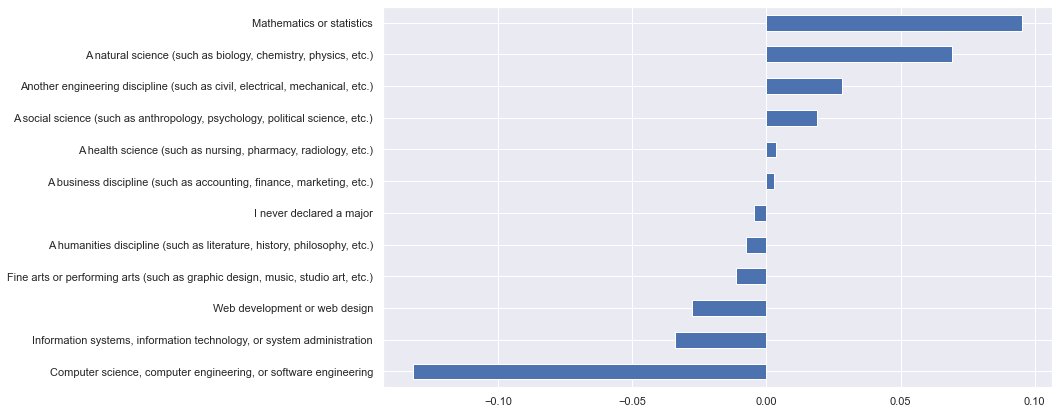

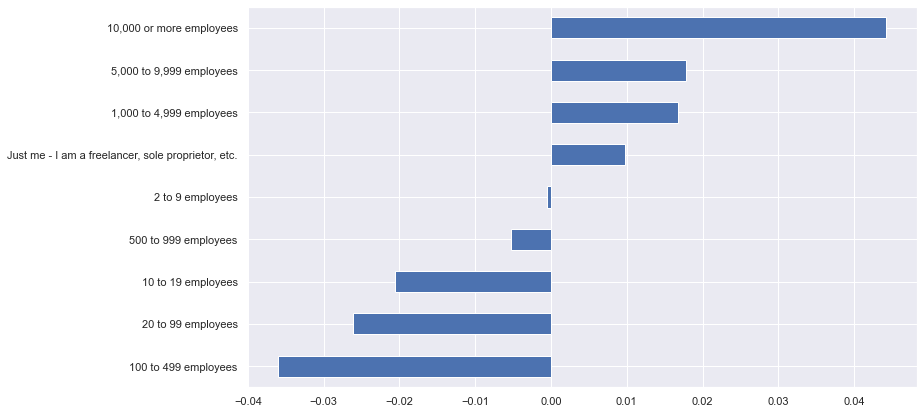

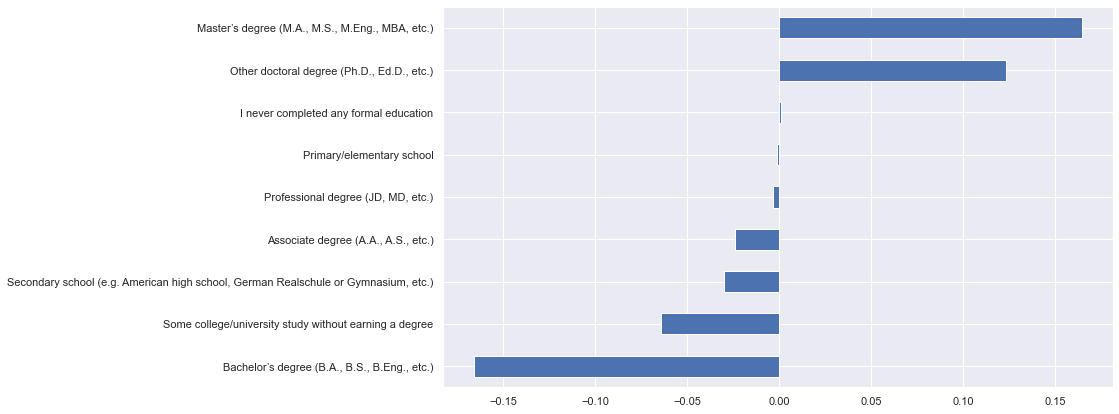

In [9]:
size = (12, 7)
categoricals = ['UndergradMajor', 'OrgSize', 'EdLevel']
for cat in categoricals:
    comparing_categoricals(df, cat)['Diff'].sort_values().plot(kind='barh', figsize=size);
    plt.show()

In [86]:
def get_percent_count(data, ds, col, topn):
    
    select = data['DataScience'] if ds else ~data['DataScience']
    
    selected_data = data.loc[select, col]
    n = selected_data.shape[0]
    result = selected_data.str.split(';').explode().value_counts(ascending=True).to_frame('count').tail(topn)
    result['percent'] = result['count'] / n
    result['category'] = col
    result['DataScience'] = ds
    return result

def concat_percent_data(data, col_list, topn=5):

    data_list = []
    for ds in [True, False]:
        for col in col_list:
            data_list.append(get_percent_count(df, ds, col, topn))

    return pd.concat(data_list).reset_index()

<AxesSubplot:>

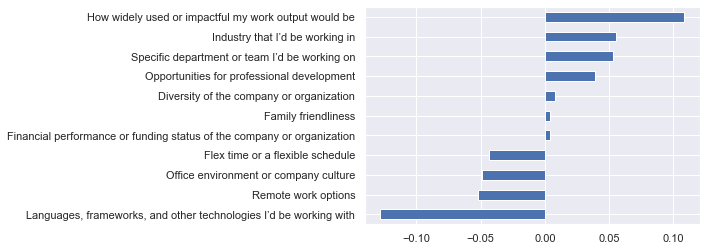

In [94]:
#concat_percent_data(df, ['JobFactors'], 50)
comparing_categoricals(df, 'JobFactors').sort_values('Diff')['Diff'].plot(kind='barh')

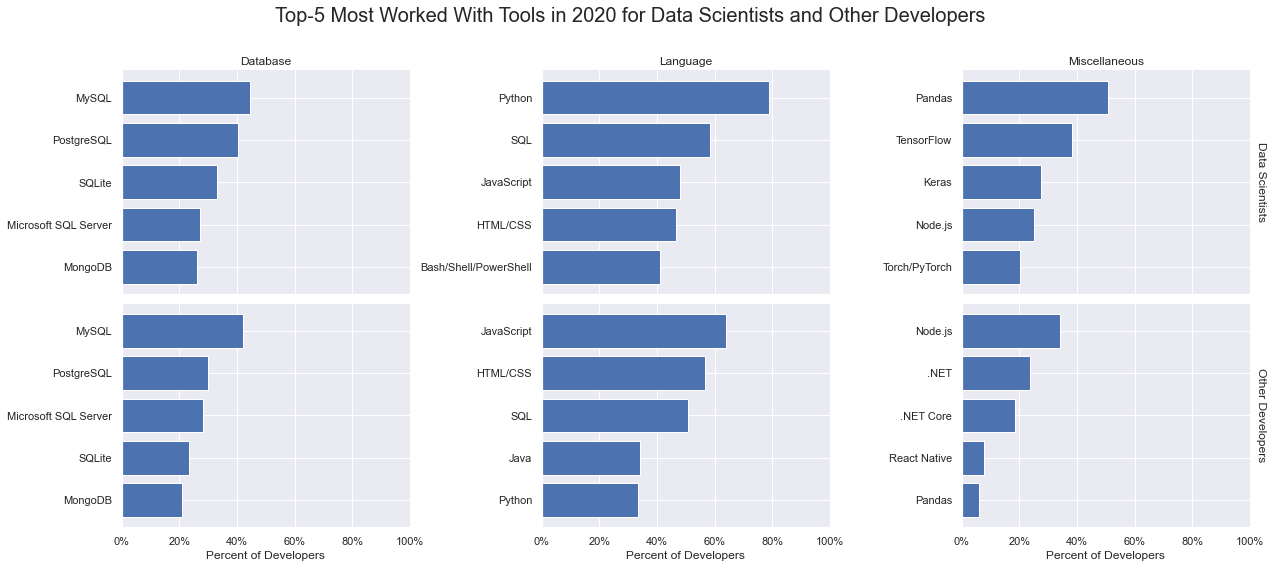

In [95]:
# formatting the axis following:
    # https://stackoverflow.com/questions/63710551/how-to-format-the-y-or-x-axis-labels-in-a-seaborn-facetgrid
# formatting title
    # https://wckdouglas.github.io/2016/12/seaborn_annoying_title
# adding title to facetgrid
    # https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

cols_prefix = ['Database', 'Language', 'MiscTech']
sufix = 'WorkedWith'
cols = [prefix + sufix for prefix in cols_prefix]
labels = ['Database', 'Language', 'Miscellaneous']

labeller = {col:label for col, label in zip(cols, labels)}

data = concat_percent_data(df, cols)
data['category'] = data['category'].map(labeller)
data['DataScience'] = data['DataScience'].map({True: 'Data Scientists', False: 'Other Developers'})
gs = sns.FacetGrid(data=data, col='category', row='DataScience', sharey=False, aspect=1.5, margin_titles=True, height=4)
gs.map(plt.barh, 'index', 'percent');
for i, ax in enumerate(gs.axes.flat):
    ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
    ax.set_ylabel('')
    ax.set_xlim((0,1))
    if i > 2:
        ax.set_xlabel('Percent of Developers')
gs.set_titles(row_template = '{row_name}', col_template = '{col_name}');

gs.fig.subplots_adjust(top=0.87)
gs.fig.suptitle('Top-5 Most Worked With Tools in 2020 for Data Scientists and Other Developers', fontsize=20);

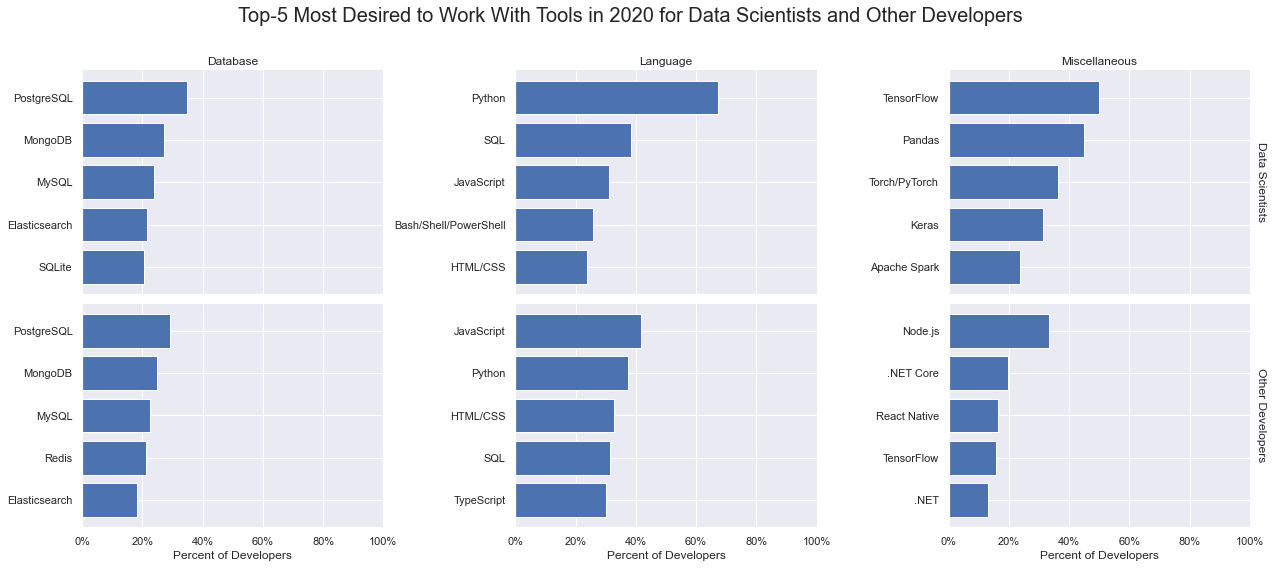

In [96]:
cols_prefix = ['Database', 'Language', 'MiscTech']
sufix = 'DesireNextYear'
cols = [prefix + sufix for prefix in cols_prefix]
labels = ['Database', 'Language', 'Miscellaneous']

labeller = {col:label for col, label in zip(cols, labels)}

data = concat_percent_data(df, cols)
data['category'] = data['category'].map(labeller)
data['DataScience'] = data['DataScience'].map({True: 'Data Scientists', False: 'Other Developers'})
gs = sns.FacetGrid(data=data, col='category', row='DataScience', sharey=False, aspect=1.5, margin_titles=True, height=4)
gs.map(plt.barh, 'index', 'percent');
for i, ax in enumerate(gs.axes.flat):
    ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
    ax.set_xlim((0,1))
    ax.set_ylabel('')
    if i > 2:
        ax.set_xlabel('Percent of Developers')
gs.set_titles(row_template = '{row_name}', col_template = '{col_name}');

gs.fig.subplots_adjust(top=0.87)
gs.fig.suptitle('Top-5 Most Desired to Work With Tools in 2020 for Data Scientists and Other Developers', fontsize=20);

In [340]:
def multicategorical_dummy(df=df, col='LanguageDesireNextYear'):
    serie = df[col].dropna()
    serie = serie.str.split(';').explode()
    return pd.get_dummies(serie).reset_index().groupby('Respondent').max()

multicategorical_dummy()

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
Respondent,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65616,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
65619,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
65623,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
